In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
plt.style.use('default')

Prepare data

In [27]:
df = pd.read_csv('data/DatasetEV3.csv')
df = df[df["100% representative"] ==1]

df['Topt category'] = df['T°_opt'].apply(lambda x: "thermophile" if x >= 45 else ("mesophile" if 0 <= x < 45 else None))

x = np.array(df['T°_opt'])
y = np.array(df['Rate mean [s-1]'])

nan_mask = np.isnan(x) | np.isnan(y)
x = x[~nan_mask]
y = y[~nan_mask]

my_pal = {"mesophile": '#FFDD55', "thermophile": '#dd8383'}

Statistical tests

In [28]:
#statistic, p_value = mannwhitneyu(mesophile_data, thermophile_data, alternative='two-sided')

group1 = df[df['Topt category'] == 'mesophile']['Rate mean [s-1]'].dropna()
group2 = df[df['Topt category'] == 'thermophile']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic, pvalue = mannwhitneyu(group1, group2)

if pvalue < 0.05:
    print(f'Mann-Whitney U test: The two groups are significantly different. p = {pvalue}')
else:
    print('Mann-Whitney U test: The two groups are not significantly different')  

Mann-Whitney U test: The two groups are significantly different. p = 0.008399284140921425


Plot

/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/envs/pymol_env/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


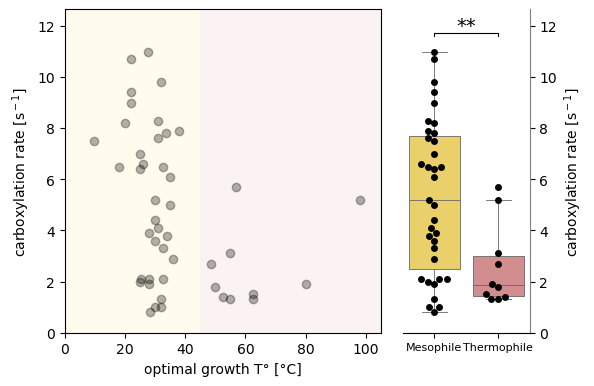

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4.2), gridspec_kw={'width_ratios': [2, 0.8]})

# scatterplot on first axis

ax1.scatter(x, y, color='black', alpha=0.3)

# Highlight the region to the left of x=45 with a yellow background
ax1.axvspan(xmin=0, xmax=45, color='#FFDD55', alpha=.1, zorder=0, linewidth=0)

# Highlight the region to the right of x=45 with a red background
ax1.axvspan(xmin=45, xmax=105, color='#dd8383', alpha=.1, zorder=0, linewidth=0)

ax1.set_xlabel('optimal growth T° [°C]')
ax1.set_ylabel('carboxylation rate [s$^-$$^1$]')
ax1.set_ylim(0, 12.65)
ax1.set_xlim(0, 105)
ax1.grid(False)

# boxplot/swarmplot on second axis

sns.boxplot(data=df, x='Topt category', y='Rate mean [s-1]', ax=ax2, palette=my_pal, showfliers=False, linewidth=0.6, order= ["mesophile", "thermophile"])
sns.swarmplot(data=df, x='Topt category', y='Rate mean [s-1]', ax=ax2, color='black', order= ["mesophile", "thermophile"])

ax2.set_xticklabels(['Mesophile', 'Thermophile'], fontsize=8)
ax2.spines.left.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.right.set_edgecolor('gray')
ax2.yaxis.tick_right()
ax2.set_ylim(0, 12.65)
ax2.set_ylabel('carboxylation rate [s$^-$$^1$]')
ax2.set_xlabel('')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.grid(False)

# Add stars to box plot to indicate significance level

stars = ''
if pvalue < 0.001:
    stars = '***'
elif pvalue < 0.01:
    stars = '**'
elif pvalue < 0.05:
    stars = '*'

ax2.text(0.5, y.max()+1, stars, ha='center', va='center', fontsize=14)
bar_height = y.max() + (y.max() * 0.01) 
ax2.plot([0, 0, 1, 1], [y.max()+0.6, bar_height+0.6, bar_height+0.6, y.max()+0.6], lw=.8, color='black')

plt.subplots_adjust(wspace=0.1)

plt.savefig(r'plots/temperature.png', dpi=300)

plt.show()